# SVM for classification

Load IRIS dataset, check its contents:


In [35]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:]) # 10 = lines/object, each object has 5 parameters
print(iris.target[:])
print(iris.data.shape)
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


Split data into training and testing parts:

In [13]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # 0.2 means 20 % -> 80 % will be used for training, rest for test
print(X_train.shape)
print(X_test.shape)
print(y_train)

(120, 4)
(30, 4)
[0 1 2 1 1 1 2 0 0 1 2 2 0 2 2 0 0 2 2 0 0 2 0 0 1 0 1 1 2 1 0 2 0 2 0 0 2
 2 2 0 2 0 1 1 0 1 2 1 0 2 2 0 0 1 0 2 1 1 1 1 0 2 2 1 2 0 1 1 1 1 2 1 1 1
 1 1 0 2 1 0 1 0 2 0 0 1 2 0 0 0 0 2 2 0 2 1 0 2 2 0 2 0 0 2 2 0 0 2 1 2 2
 1 2 1 1 0 1 0 0 1]


Use a Support Vector Machine for classification:


In [14]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train) # fit = train
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# extract iris data, but just the 2D, extract 3rd dimension
X = iris.data[iris.target!=2, 0:2]
Y = iris.target[iris.target!=2]

# extract train and test data from 2D variables
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# train the model
SVMmodel.fit(x_train, y_train)
SVMmodel.get_params()
SVMmodel.score(x_test, y_test)

print(X.shape)
print(Y.shape)


print(Y)

(100, 2)
(100,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

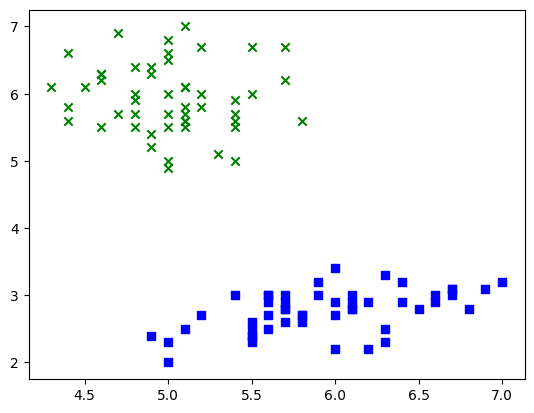

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X[Y==0,0], X[Y==1, 0], color='green', marker='x')
plt.scatter(X[Y==1,0], X[Y==1, 1], color='blue', marker='s')


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

[[ 2.22543629 -2.22255231]]
[-5.01740171]


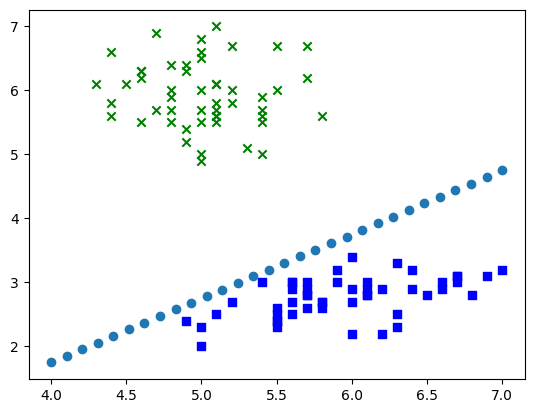

In [34]:
import numpy as np

supvectors=SVMmodel.support_vectors_
# Plot the support vectors here


#Separating line coefficients:
W=SVMmodel.coef_
b=SVMmodel.intercept_
print(W)
print(b)

x0 = np.linspace(4, 7, 30)
x1 = -(b+W[:,0]*x0)/W[:,1]

plt.scatter(x0, x1)
plt.scatter(X[Y==0,0], X[Y==1, 0], color='green', marker='x')
plt.scatter(X[Y==1,0], X[Y==1, 1], color='blue', marker='s')



# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

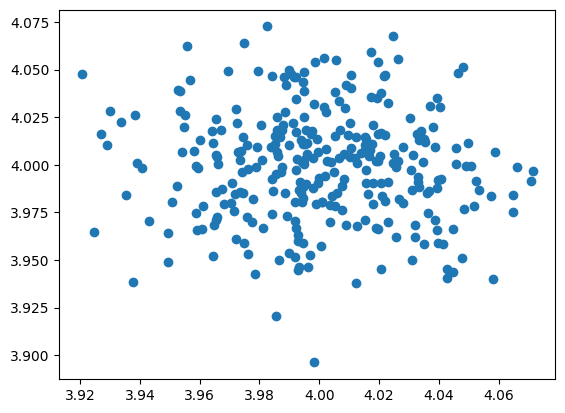

In [2]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random
import matplotlib.pyplot as plt

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.03, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

[ 1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1]


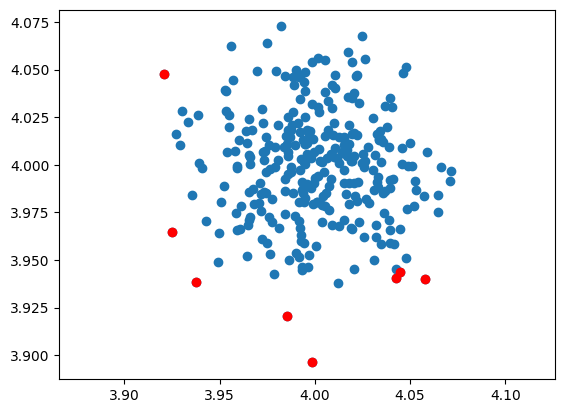

In [3]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
print(pred)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

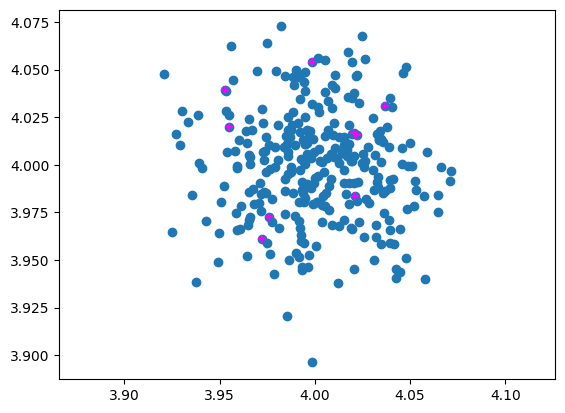

In [6]:
plt.scatter(x[:,0], x[:, 1])
plt.axis('equal')
supvectors2=SVMmodelOne.support_vectors_
plt.scatter(supvectors2[:,0], supvectors2[:,1], color='magenta', marker='+')

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.999945356775873


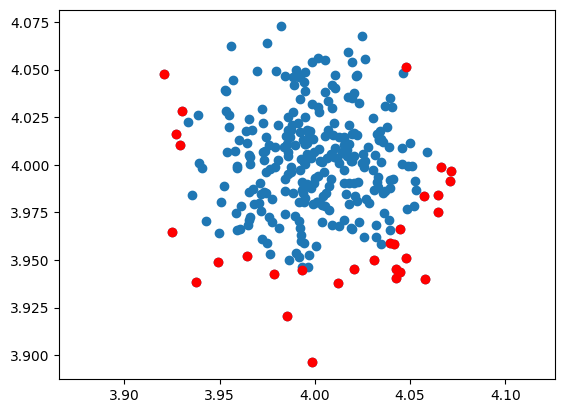

In [36]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.1)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()